In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb # data visualization
import matplotlib.pyplot as plt #data visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
from bokeh.io import show
from bokeh.sampledata import us_states
from bokeh.plotting import figure
import squarify
import platform
import plotly.express as px


from mpl_toolkits.basemap import Basemap
from matplotlib import cm

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

/kaggle/input/aviation-accident-database-synopses/AviationData.csv


Problem : To find out the most significant factor when it comes to aircraft safety- which variables affect the number of aircraft accidents

In [2]:
AviationData = pd.read_csv('../input/aviation-accident-database-synopses/AviationData.csv', engine='python')
pd.set_option('display.max_rows', None)

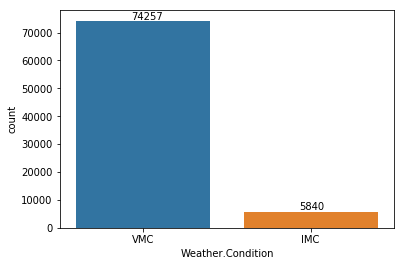

In [3]:
#create a data frame for weather conditions 
WC = pd.DataFrame(AviationData['Weather.Condition'])
#clean UNK values from the data frame
WC.drop(WC[WC.values == "UNK"].index, inplace = True)
#clean NaN values from the data frame
WC = WC.dropna(axis=0)
#count plot for VMC and IMC weather
weatherplot = sb.countplot(x="Weather.Condition", data = WC)
#loop to annotate the exact count on top of the count plot
for p in weatherplot.patches:
    weatherplot.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+500))


In [4]:
vmcdata = AviationData.loc[(AviationData['Weather.Condition'] == "VMC")]
imcdata = AviationData.loc[(AviationData['Weather.Condition'] == "IMC")]
AviationData['Event.Date'] = pd.to_datetime(AviationData['Event.Date'])
AviationData['Year'] = AviationData['Event.Date'].dt.year
AviationData['Month'] = AviationData['Event.Date'].dt.month
AviationData = AviationData[AviationData['Year'] >= 1982]

vmcdata_accidents_per_year = vmcdata.groupby('Year').size()
imcdata_accidents_per_year = imcdata.groupby('Year').size()
fig = plt.figure(figsize = (10,10))
subplot = fig.add_subplot(1,1,1)
vmcdata_accidents_per_year.plot(ax=subplot, marker = 'o')
imcdata_accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('Number of Accidents')
subplot.set_title('Accidents per Year by Weather Condition')

KeyError: 'Year'

display(AviationData)

print(AviationData.dtypes)

AviationData['Weather.Condition'].fillna('undefined')

*Number of accidents can't be counted using countplot*

Text(0.5, 1.0, 'Accidents per Year')

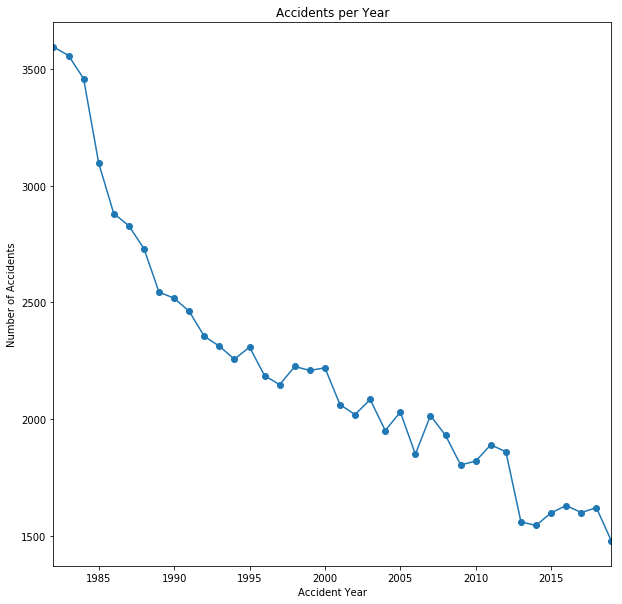

In [5]:
AviationData['Event.Date'] = pd.to_datetime(AviationData['Event.Date'])
AviationData['Year'] = AviationData['Event.Date'].dt.year
AviationData['Month'] = AviationData['Event.Date'].dt.month
AviationData = AviationData[AviationData['Year'] >= 1982]

accidents_per_year = AviationData.groupby('Year').size()
fig = plt.figure(figsize = (10,10))
subplot = fig.add_subplot(1,1,1)
accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('Number of Accidents')
subplot.set_title('Accidents per Year')

In [6]:
print(AviationData.groupby('Year').size())

Year
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1931
2009    1805
2010    1821
2011    1891
2012    1861
2013    1561
2014    1546
2015    1600
2016    1631
2017    1601
2018    1622
2019    1479
dtype: int64


Use the last two digits of Event.Data to do countplot for accident by year

ax = sns.countplot(x="class", hue="who", data=titanic) - *bi-variate countplot*

Prediction for 2015 is 1547 
Actual for 2015 is: 1600

Prediction for 2016 is 1501 
Actual for 2016 is: 1631

Prediction for 2017 is 1455 
Actual for 2017 is: 1601

Prediction for 2018 is 1409 
Actual for 2018 is: 1622

Prediction for 2019 is 1362 
Actual for 2019 is: 1479



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



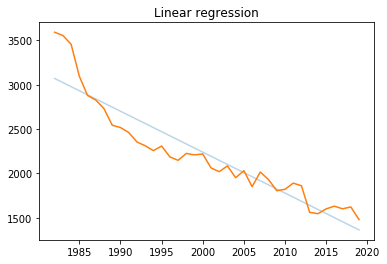

Goodness of Fit of Model 	

Explained Variance (R^2) 	: 0.8656372251451157
Mean Squared Error (MSE) 	: 39805.22263175167



In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
x = [[year] for year in accidents_per_year.index.values]
# list of years 

y = [[count] for count in accidents_per_year.as_matrix()]
# list of accidents per year

lr_pred_x = [[year] for year in range(1982, 2020)]
linreg = LinearRegression()
linreg.fit(x, y)
lr_pred=linreg.predict(lr_pred_x)


print("Prediction for 2015 is %d "  % lr_pred[33])
print("Actual for 2015 is: 1600\n")
print("Prediction for 2016 is %d "  % lr_pred[34])
print("Actual for 2016 is: 1631\n")
print("Prediction for 2017 is %d "  %  lr_pred[35])
print("Actual for 2017 is: 1601\n")
print("Prediction for 2018 is %d "  %   lr_pred[36])
print("Actual for 2018 is: 1622\n")
print("Prediction for 2019 is %d "  %   lr_pred[37])
print("Actual for 2019 is: 1479\n")

plt.plot(lr_pred_x, lr_pred, alpha=.3)
plt.plot(x, y)
plt.title("Linear regression")
plt.show()

print("Goodness of Fit of Model \t")
print()
print("Explained Variance (R^2) \t:", explained_variance_score(y, lr_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y, lr_pred))
print()


In [8]:
injuries = pd.DataFrame(AviationData)
Casualties = injuries[["Total.Serious.Injuries","Total.Fatal.Injuries","Total.Minor.Injuries"]]
Casualties = Casualties.fillna(0,axis =0)
CasualtiesSum = Casualties["Total.Serious.Injuries"] + Casualties["Total.Fatal.Injuries"] + Casualties["Total.Minor.Injuries"]
Casualties["Total.Casualties"] = CasualtiesSum
#Combined number of fatal and serious injuries


indexNames = Casualties[ Casualties['Total.Casualties'] == 0 ].index
Casualties.drop(indexNames , inplace=True) # remove all rows where number of total casualties = 0

*cleaning of data*

In [9]:
weatherinjuries = pd.concat([Casualties, WC.reindex(index=Casualties.index)],sort = False , axis=1, join='inner')
weatherinjuries = weatherinjuries.dropna(axis =0)
weatherinjuries.head(10) # combining weather condition and casualties into 1 dataframe to plot a graph

,Total.Serious.Injuries,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Casualties,Weather.Condition
1,0.0,2.0,0.0,2.0,VMC
5,2.0,5.0,2.0,9.0,IMC
6,0.0,1.0,0.0,1.0,VMC
9,1.0,0.0,0.0,1.0,VMC
20,0.0,0.0,2.0,2.0,VMC
23,0.0,1.0,0.0,1.0,VMC
24,0.0,0.0,1.0,1.0,VMC
26,1.0,0.0,0.0,1.0,VMC
27,0.0,2.0,0.0,2.0,VMC
32,1.0,0.0,0.0,1.0,VMC


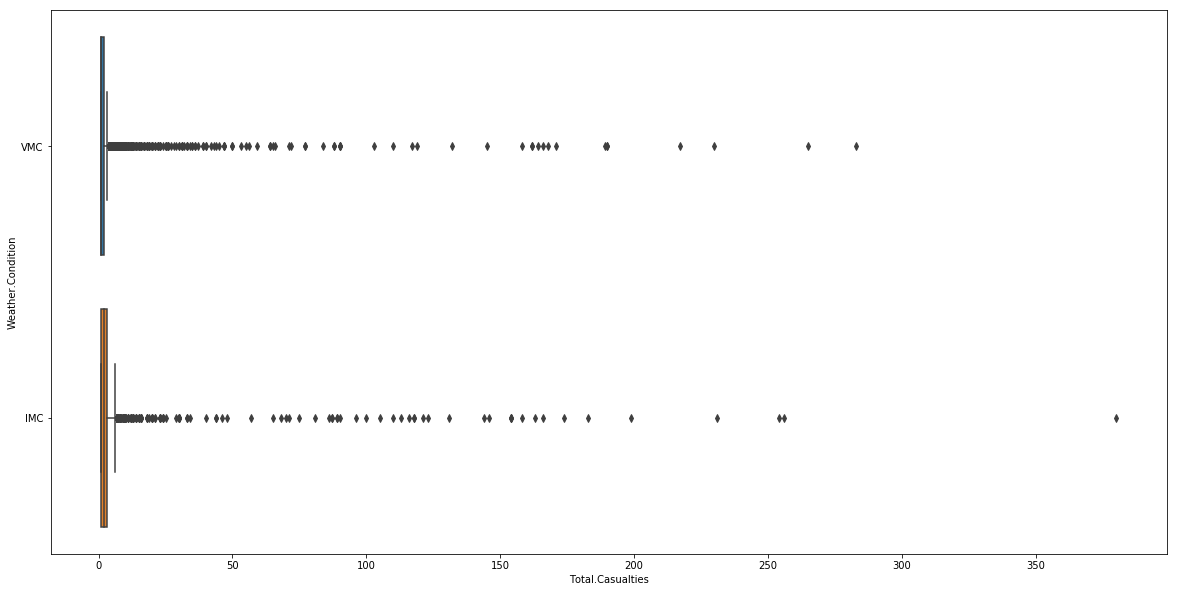

In [10]:
plt.figure(figsize=(20,10))
ax = sb.boxplot(y="Weather.Condition",x = "Total.Casualties", data=weatherinjuries)

Weather condition is a very significant factor. Considering the vast difference in number of IMC and VMC, from the boxplot IMC has a higher number of total casualties. Which suggests that weather condition will heavily affect the severity of the accident.

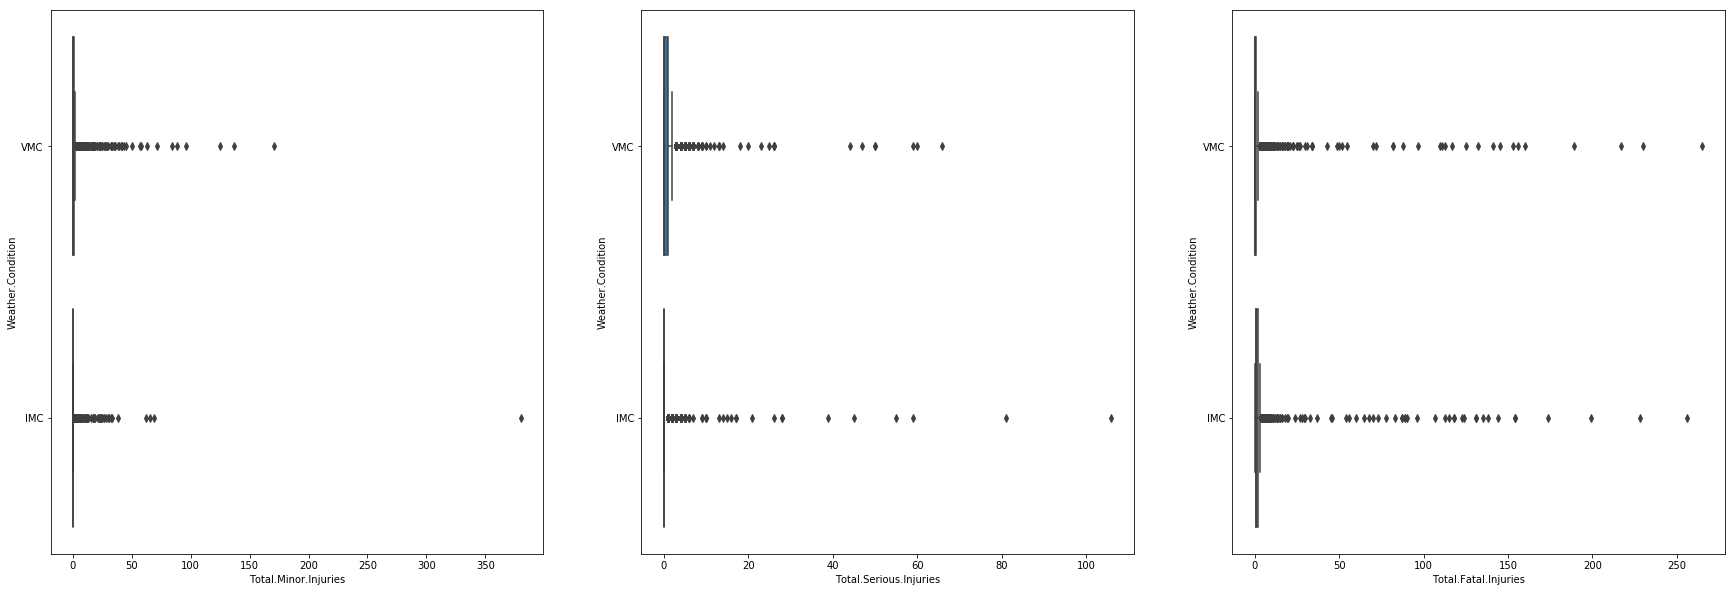

In [11]:
f, axes = plt.subplots(1,3,figsize =(30,10))
sb.boxplot(y="Weather.Condition",x = "Total.Minor.Injuries", data=weatherinjuries, ax = axes[0])
sb.boxplot(y="Weather.Condition",x = "Total.Serious.Injuries", data=weatherinjuries, ax = axes [1])
sb.boxplot(y="Weather.Condition",x = "Total.Fatal.Injuries", data=weatherinjuries, ax = axes[2])


 From the above plots we can see that generally in good weather conditions there tends to be less fatal accidents as compared to bad weather conditions especially when we consider the significant difference in number of data for VMC and IMC weather conditions, but it is not conclusive. Hence we have to consider other factors.

Here we consider location and whether it is a significant factor. Since 94% of the data is from the US, we will mainly consider the data from the US.

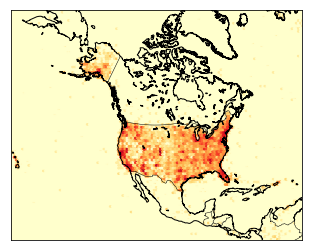

In [12]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
north, south, east, west = 71.39, 24.52, -66.95, 172.5

m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.0,urcrnrlon=-2.566,urcrnrlat=46.352,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',area_thresh=1000.0,projection='lcc',
            lat_1=50.0,lon_0=-107.0,ax=ax)
x, y = m(AviationData['Longitude'].values, AviationData['Latitude'].values)
m.drawcoastlines()
m.drawcountries()
m.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.YlOrRd)

From this map, we can see that the datapoints are quite spread out across the US, but they are concentrated where major states are located such as California, New York and Florida. Hence, location might affect aircraft safety. However, this might not be accurate either as being major sites of air traffic might just mean that the higher accident rate could be due to the sheer number of aircraft in these areas. Now, we look at the make of the aircraft.

In [13]:
make = pd.Index(AviationData['Make'])
make.value_counts().head()

CESSNA    17781
PIPER      9803
Cessna     8289
Piper      4426
BEECH      3274
Name: Make, dtype: int64

In [14]:
make = pd.Index(AviationData['Make'])
make = make.str.upper()
# There are both upper and lowercase characters for each make, so we make everything uppercase here

In [15]:
make.value_counts().head()

CESSNA    26070
PIPER     14229
BEECH      5148
BELL       2598
BOEING     2349
Name: Make, dtype: int64

In [16]:
make = make.value_counts()
make = pd.DataFrame(make)
make.drop(make.index[10:], inplace = True)

In [17]:
print(make)
# Top 10 aircraft makes

           Make
CESSNA    26070
PIPER     14229
BEECH      5148
BELL       2598
BOEING     2349
MOONEY     1272
GRUMMAN    1152
ROBINSON   1124
BELLANCA   1020
HUGHES      913


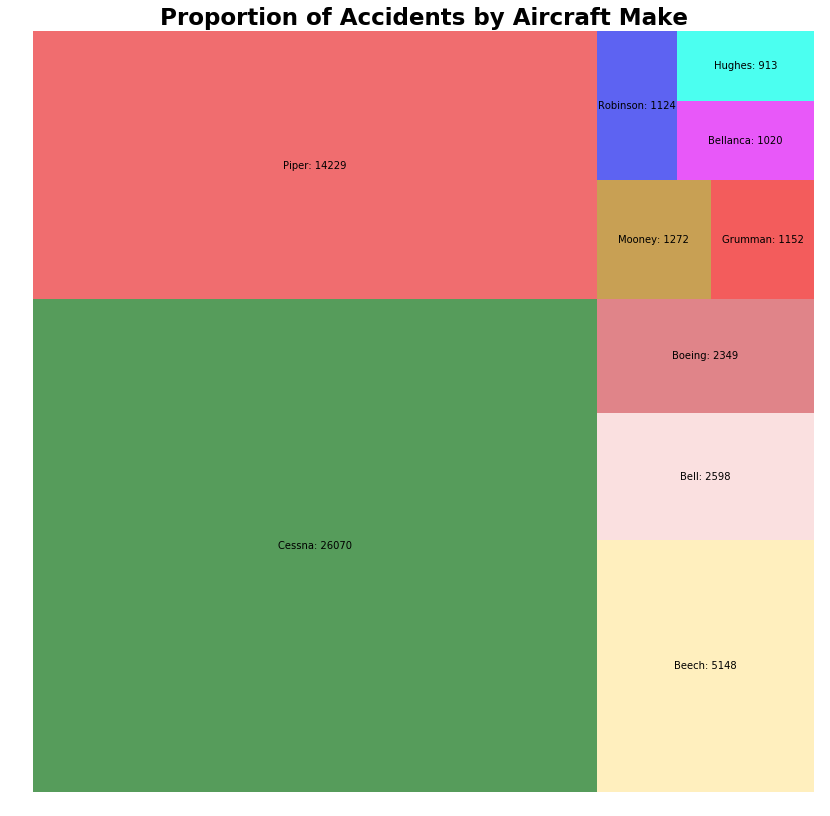

In [18]:
number = [26070, 14229, 5148, 2598, 2349,1272,1152,1124,1020,913]
labels = ['Cessna: 26070', 'Piper: 14229',
          'Beech: 5148', 'Bell: 2598',
          'Boeing: 2349','Mooney: 1272','Grumman: 1152','Robinson: 1124','Bellanca: 1020','Hughes: 913']
color_list = ['#0f7216', '#ea3033', '#ffe9a3',
              '#f9d4d4', '#d35158', '#b2790c','#EF1818','#1922ED','#DF12F7','#00FFEA']


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 14)
plt.rc('font', size=10)
plt.title("Proportion of Accidents by Aircraft Make",fontsize=23,fontweight="bold")
squarify.plot(sizes=number, label=labels,
              color=color_list, alpha=0.7)
plt.axis('off')

plt.show()

We can go furter in depth and analyse what type of damage each accident for each aircraft type experienced.
Can explore on cessna and maybe theres a model that have higher than average number of accidents

Text(0.5, 1.0, 'Cessna Accidents per Year')

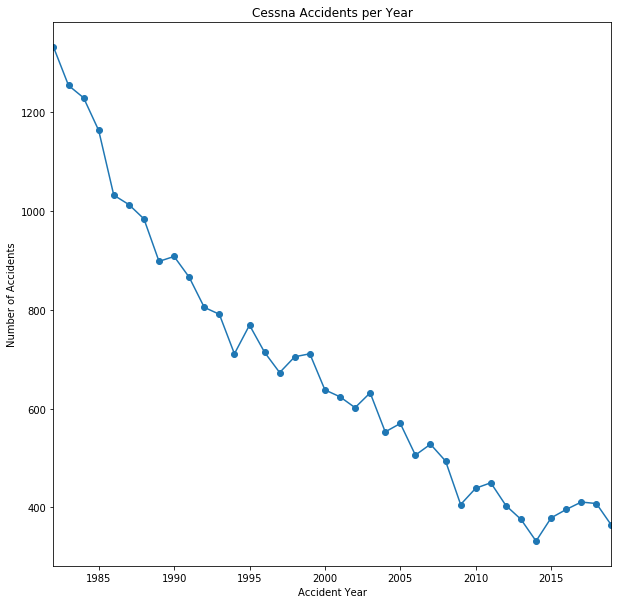

In [19]:
# Time series for Top 5 aircraft make to analyse if there is a consistent trend between each aircraft type and the general overall trend
cessnadata = AviationData.loc[(AviationData['Make'] == "CESSNA")|(AviationData['Make'] == "Cessna")]

#Cessna
AviationData['Event.Date'] = pd.to_datetime(AviationData['Event.Date'])
AviationData['Year'] = AviationData['Event.Date'].dt.year
AviationData['Month'] = AviationData['Event.Date'].dt.month
AviationData = AviationData[AviationData['Year'] >= 1982]

cessna_accidents_per_year = cessnadata.groupby('Year').size()
fig = plt.figure(figsize = (10,10))
subplot = fig.add_subplot(1,1,1)
cessna_accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('Number of Accidents')
subplot.set_title('Cessna Accidents per Year')

Text(0.5, 1.0, 'Piper Accidents per Year')

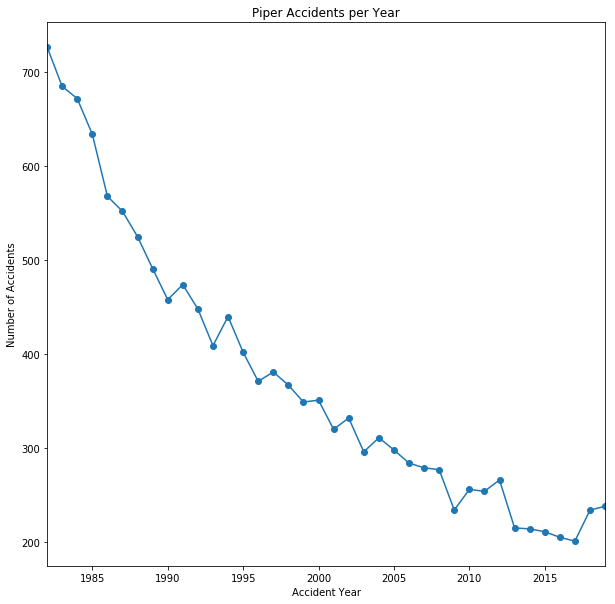

In [20]:
piperdata = AviationData.loc[(AviationData['Make'] == "PIPER")|(AviationData['Make'] == "Piper")]
#Piper
AviationData['Event.Date'] = pd.to_datetime(AviationData['Event.Date'])
AviationData['Year'] = AviationData['Event.Date'].dt.year
AviationData['Month'] = AviationData['Event.Date'].dt.month
AviationData = AviationData[AviationData['Year'] >= 1982]

piper_accidents_per_year = piperdata.groupby('Year').size()
fig = plt.figure(figsize = (10,10))
subplot = fig.add_subplot(1,1,1)
piper_accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('Number of Accidents')
subplot.set_title('Piper Accidents per Year')

Text(0.5, 1.0, 'Beech Accidents per Year')

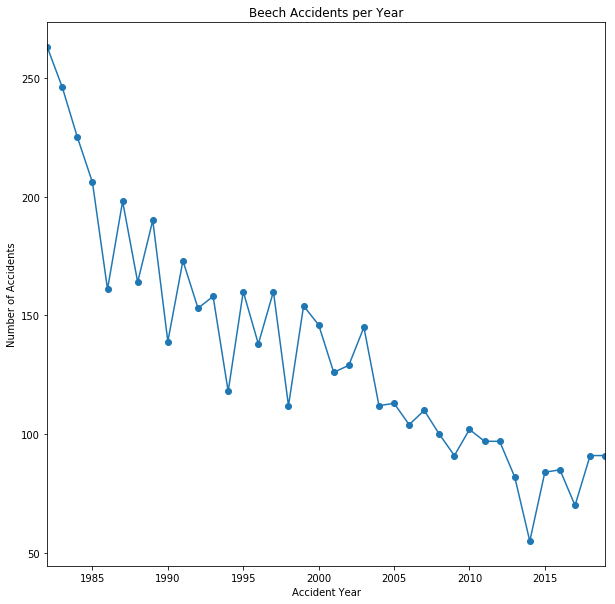

In [21]:
beechdata = AviationData.loc[(AviationData['Make'] == "BEECH")|(AviationData['Make'] == "Beech")]
#beech
AviationData['Event.Date'] = pd.to_datetime(AviationData['Event.Date'])
AviationData['Year'] = AviationData['Event.Date'].dt.year
AviationData['Month'] = AviationData['Event.Date'].dt.month
AviationData = AviationData[AviationData['Year'] >= 1982]

beech_accidents_per_year = beechdata.groupby('Year').size()
fig = plt.figure(figsize = (10,10))
subplot = fig.add_subplot(1,1,1)
beech_accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('Number of Accidents')
subplot.set_title('Beech Accidents per Year')

Text(0.5, 1.0, 'Bell Accidents per Year')

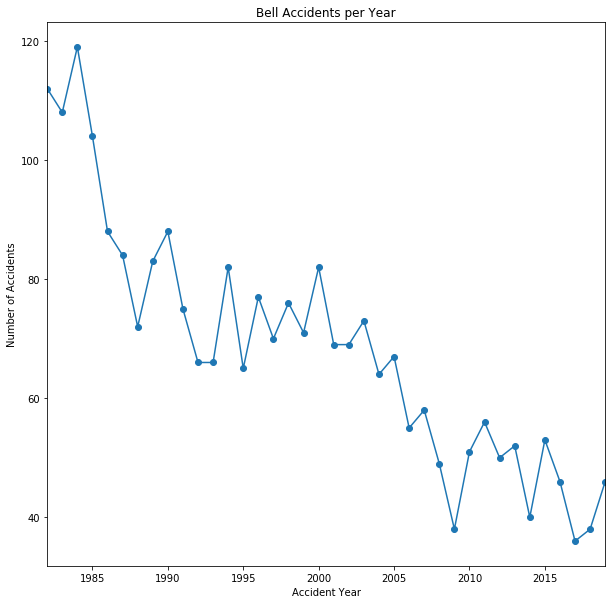

In [22]:
belldata = AviationData.loc[(AviationData['Make'] == "BELL")|(AviationData['Make'] == "Bell")]
#bell
AviationData['Event.Date'] = pd.to_datetime(AviationData['Event.Date'])
AviationData['Year'] = AviationData['Event.Date'].dt.year
AviationData['Month'] = AviationData['Event.Date'].dt.month
AviationData = AviationData[AviationData['Year'] >= 1982]

bell_accidents_per_year = belldata.groupby('Year').size()
fig = plt.figure(figsize = (10,10))
subplot = fig.add_subplot(1,1,1)
bell_accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('Number of Accidents')
subplot.set_title('Bell Accidents per Year')

Text(0.5, 1.0, 'Boeing Accidents per Year')

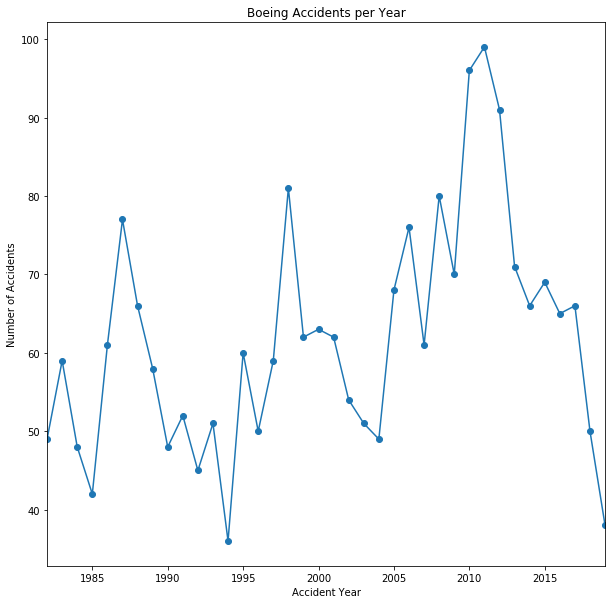

In [23]:
boeingdata = AviationData.loc[(AviationData['Make'] == "BOEING")|(AviationData['Make'] == "Boeing")]
#boeing
AviationData['Event.Date'] = pd.to_datetime(AviationData['Event.Date'])
AviationData['Year'] = AviationData['Event.Date'].dt.year
AviationData['Month'] = AviationData['Event.Date'].dt.month
AviationData = AviationData[AviationData['Year'] >= 1982]

boeing_accidents_per_year = boeingdata.groupby('Year').size()
fig = plt.figure(figsize = (10,10))
subplot = fig.add_subplot(1,1,1)
boeing_accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('Number of Accidents')
subplot.set_title('Boeing Accidents per Year')

Text(0.5, 1.0, 'Numer of Accidents for each Make per Year')

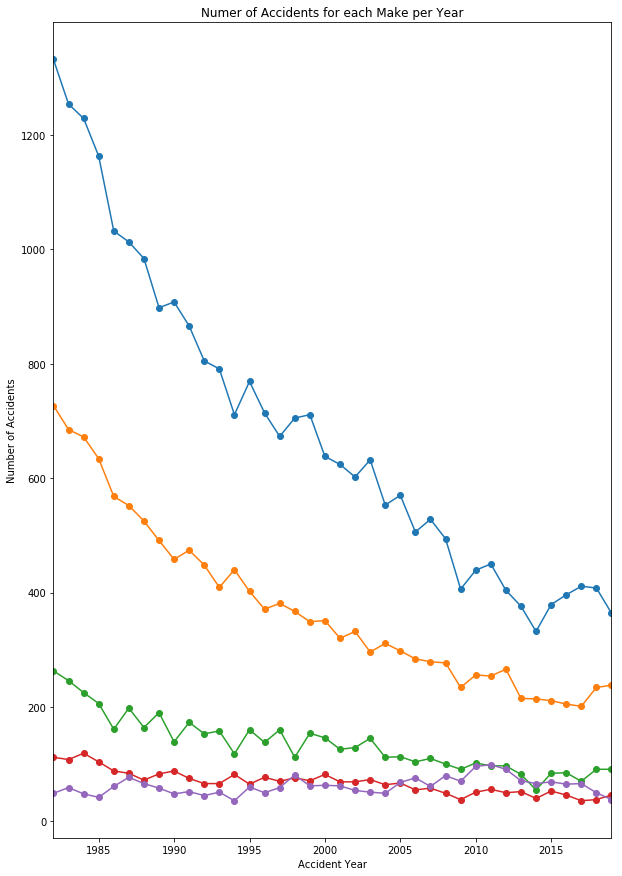

In [24]:
fig = plt.figure(figsize = (10,15))
subplot = fig.add_subplot(1,1,1)
cessna_accidents_per_year.plot(ax=subplot, marker = 'o')
piper_accidents_per_year.plot(ax=subplot, marker = 'o')
beech_accidents_per_year.plot(ax=subplot, marker = 'o')
bell_accidents_per_year.plot(ax=subplot, marker = 'o')
boeing_accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('Number of Accidents')
subplot.set_title('Numer of Accidents for each Make per Year')

Top 5 Aicraft makes all show a downwards trend except for Boeing. Boeing has a fluctuating trend where there is no clear upwards or downwards movement. This could suggest that while safety standards for other aircraft makes have improved over the years, Boeing's safety standards remains inconsistent. 

How about the model? We can take a look at Cessna, the make with the highest number of data.

In [25]:
cessnamodel = cessnadata["Model"]
top10model = cessnamodel.value_counts()
top10model = pd.DataFrame(top10model)
top10model.drop(top10model.index[10:], inplace = True)
print(top10model)

      Model
152    2331
172    1579
172N   1141
150     783
172M    780
172P    675
180     591
182     590
150M    584
150L    451


Piechart for Cessna models

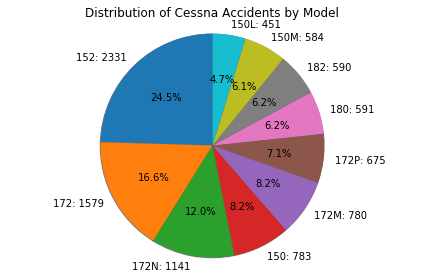

In [26]:
sizes = [2331, 1579, 1141, 783, 780,675,591,590,584,451]
labels = ['152: 2331', '172: 1579',
          '172N: 1141', '150: 783',
          '172M: 780','172P: 675','180: 591','182: 590','150M: 584','150L: 451']
# Pie chart

fig1, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius = 5)
ax.axis('equal')
ax.set_title("Distribution of Cessna Accidents by Model")
plt.tight_layout()
plt.show()

This time we will analyse the top 3 models as they have more than 1000 accidents

Text(0.5, 1.0, 'Model 152 Accidents per Year')

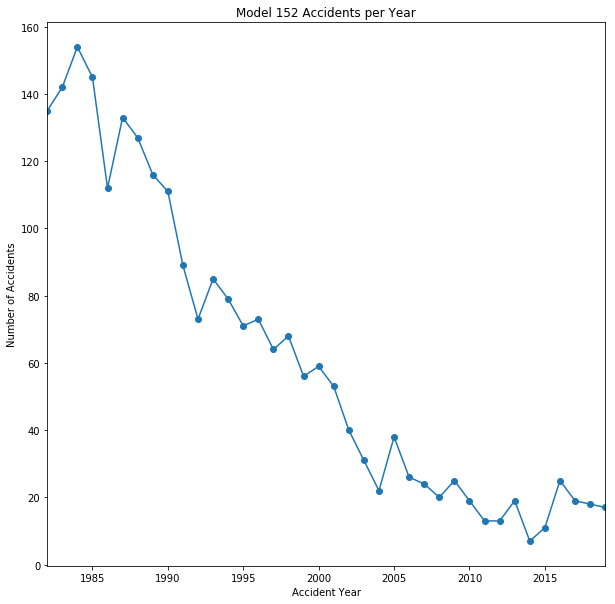

In [27]:
data152 = AviationData.loc[(AviationData['Model'] == "152")]
AviationData['Event.Date'] = pd.to_datetime(AviationData['Event.Date'])
AviationData['Year'] = AviationData['Event.Date'].dt.year
AviationData['Month'] = AviationData['Event.Date'].dt.month
AviationData = AviationData[AviationData['Year'] >= 1982]

data152_accidents_per_year = data152.groupby('Year').size()
fig = plt.figure(figsize = (10,10))
subplot = fig.add_subplot(1,1,1)
data152_accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('Number of Accidents')
subplot.set_title('Model 152 Accidents per Year')

Text(0.5, 1.0, 'Model 172 Accidents per Year')

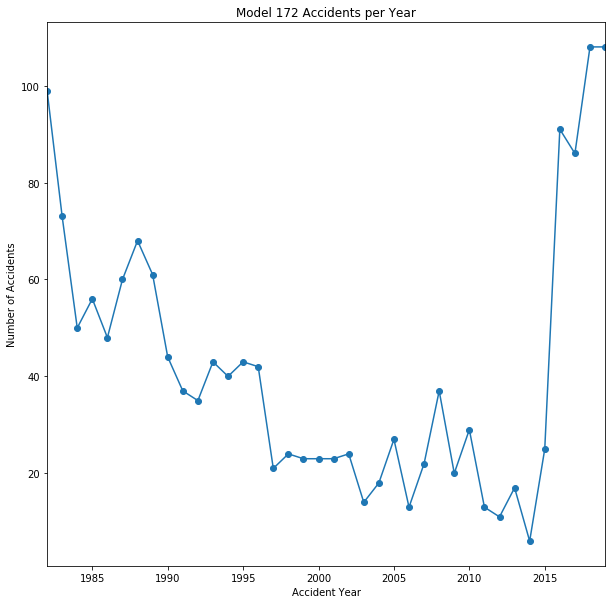

In [28]:
data172 = AviationData.loc[(AviationData['Model'] == "172")]
AviationData['Event.Date'] = pd.to_datetime(AviationData['Event.Date'])
AviationData['Year'] = AviationData['Event.Date'].dt.year
AviationData['Month'] = AviationData['Event.Date'].dt.month
AviationData = AviationData[AviationData['Year'] >= 1982]

data172_accidents_per_year = data172.groupby('Year').size()
fig = plt.figure(figsize = (10,10))
subplot = fig.add_subplot(1,1,1)
data172_accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('Number of Accidents')
subplot.set_title('Model 172 Accidents per Year')

Text(0.5, 1.0, 'Model 172N Accidents per Year')

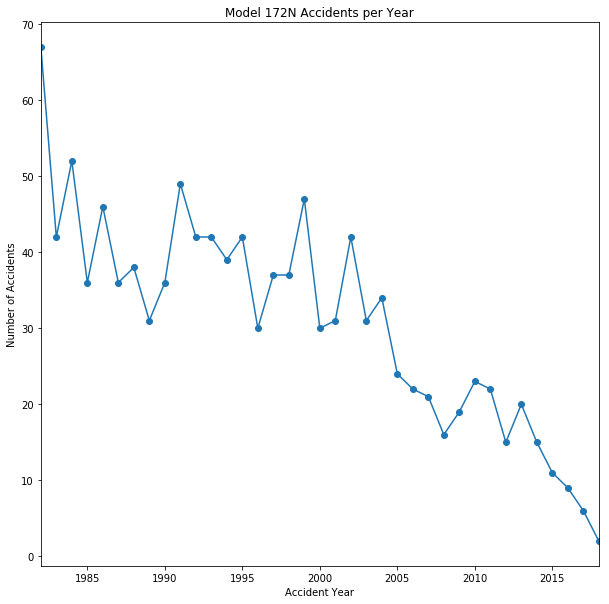

In [29]:
data172N = AviationData.loc[(AviationData['Model'] == "172N")]
AviationData['Event.Date'] = pd.to_datetime(AviationData['Event.Date'])
AviationData['Year'] = AviationData['Event.Date'].dt.year
AviationData['Month'] = AviationData['Event.Date'].dt.month
AviationData = AviationData[AviationData['Year'] >= 1982]

data172N_accidents_per_year = data172N.groupby('Year').size()
fig = plt.figure(figsize = (10,10))
subplot = fig.add_subplot(1,1,1)
data172N_accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('Number of Accidents')
subplot.set_title('Model 172N Accidents per Year')

Model 172 experienced a general downward trend until 2014 when it saw it significant increase where the number of accidents for the 172 reached record heights.

Text(0.5, 1.0, 'Accidents for Top 3 Cessna Models per Year')

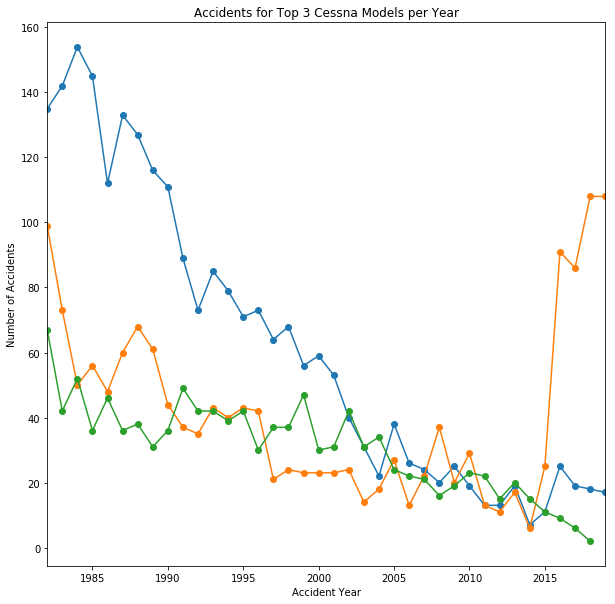

In [30]:
fig = plt.figure(figsize = (10,10))
subplot = fig.add_subplot(1,1,1)
data152_accidents_per_year.plot(ax=subplot, marker = 'o')
data172_accidents_per_year.plot(ax=subplot, marker = 'o')
data172N_accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('Number of Accidents')
subplot.set_title('Accidents for Top 3 Cessna Models per Year')

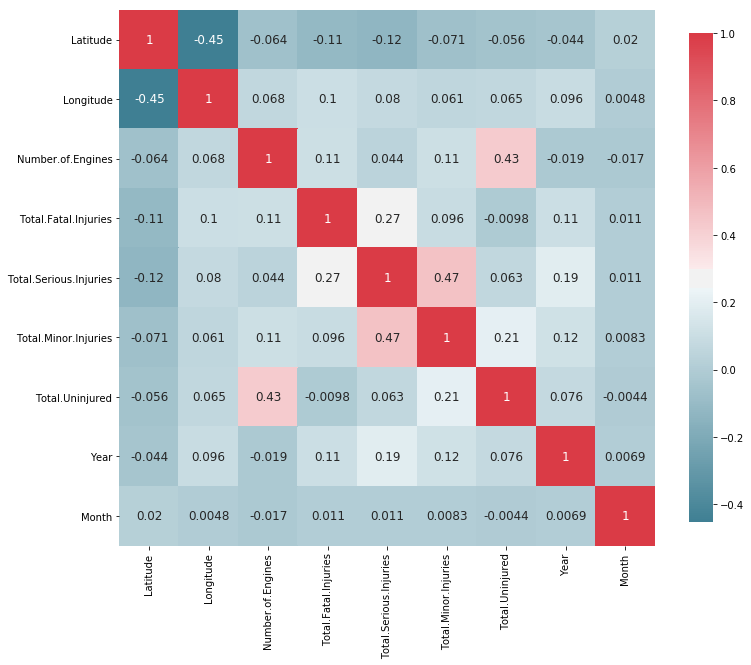

In [31]:
def plot_correlation_map( df ):
    corr = df.corr()
    plot , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sb.diverging_palette( 220 , 10 , as_cmap = True )
    plot = sb.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(AviationData)

In [32]:
AviationData.corr()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Month
Latitude,1.000000,-0.453581,-0.064152,-0.109555,-0.124782,-0.071012,-0.055955,-0.044136,0.020448
Longitude,-0.453581,1.000000,0.067994,0.103816,0.079863,0.061149,0.064955,0.096455,0.004767
Number.of.Engines,-0.064152,0.067994,1.000000,0.109651,0.043577,0.110712,0.425452,-0.018714,-0.017406
Total.Fatal.Injuries,-0.109555,0.103816,0.109651,1.000000,0.265237,0.096402,-0.009772,0.108446,0.010879
Total.Serious.Injuries,-0.124782,0.079863,0.043577,0.265237,1.000000,0.465954,0.063376,0.190074,0.011364
Total.Minor.Injuries,-0.071012,0.061149,0.110712,0.096402,0.465954,1.000000,0.207713,0.122688,0.008272
Total.Uninjured,-0.055955,0.064955,0.425452,-0.009772,0.063376,0.207713,1.000000,0.075512,-0.004424
Year,-0.044136,0.096455,-0.018714,0.108446,0.190074,0.122688,0.075512,1.000000,0.006897
Month,0.020448,0.004767,-0.017406,0.010879,0.011364,0.008272,-0.004424,0.006897,1.000000


In [33]:
AviationData.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Month
count,30161.000000,30152.000000,79222.000000,57053.000000,54379.000000,55587.000000,69668.000000,84255.000000,84255.000000
mean,37.544765,-93.509477,1.146929,0.847423,0.331709,0.518736,5.901117,1997.995454,6.588950
std,12.370659,39.455446,0.447010,6.292761,1.375643,2.771459,29.534975,10.997132,3.060404
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000,1982.000000,1.000000
25%,33.307778,-114.861111,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000,4.000000
50%,38.125278,-94.371806,1.000000,0.000000,0.000000,0.000000,1.000000,1997.000000,7.000000
75%,42.525556,-81.650833,1.000000,1.000000,0.000000,1.000000,2.000000,2007.000000,9.000000
max,89.218056,179.618611,8.000000,349.000000,111.000000,380.000000,699.000000,2019.000000,12.000000


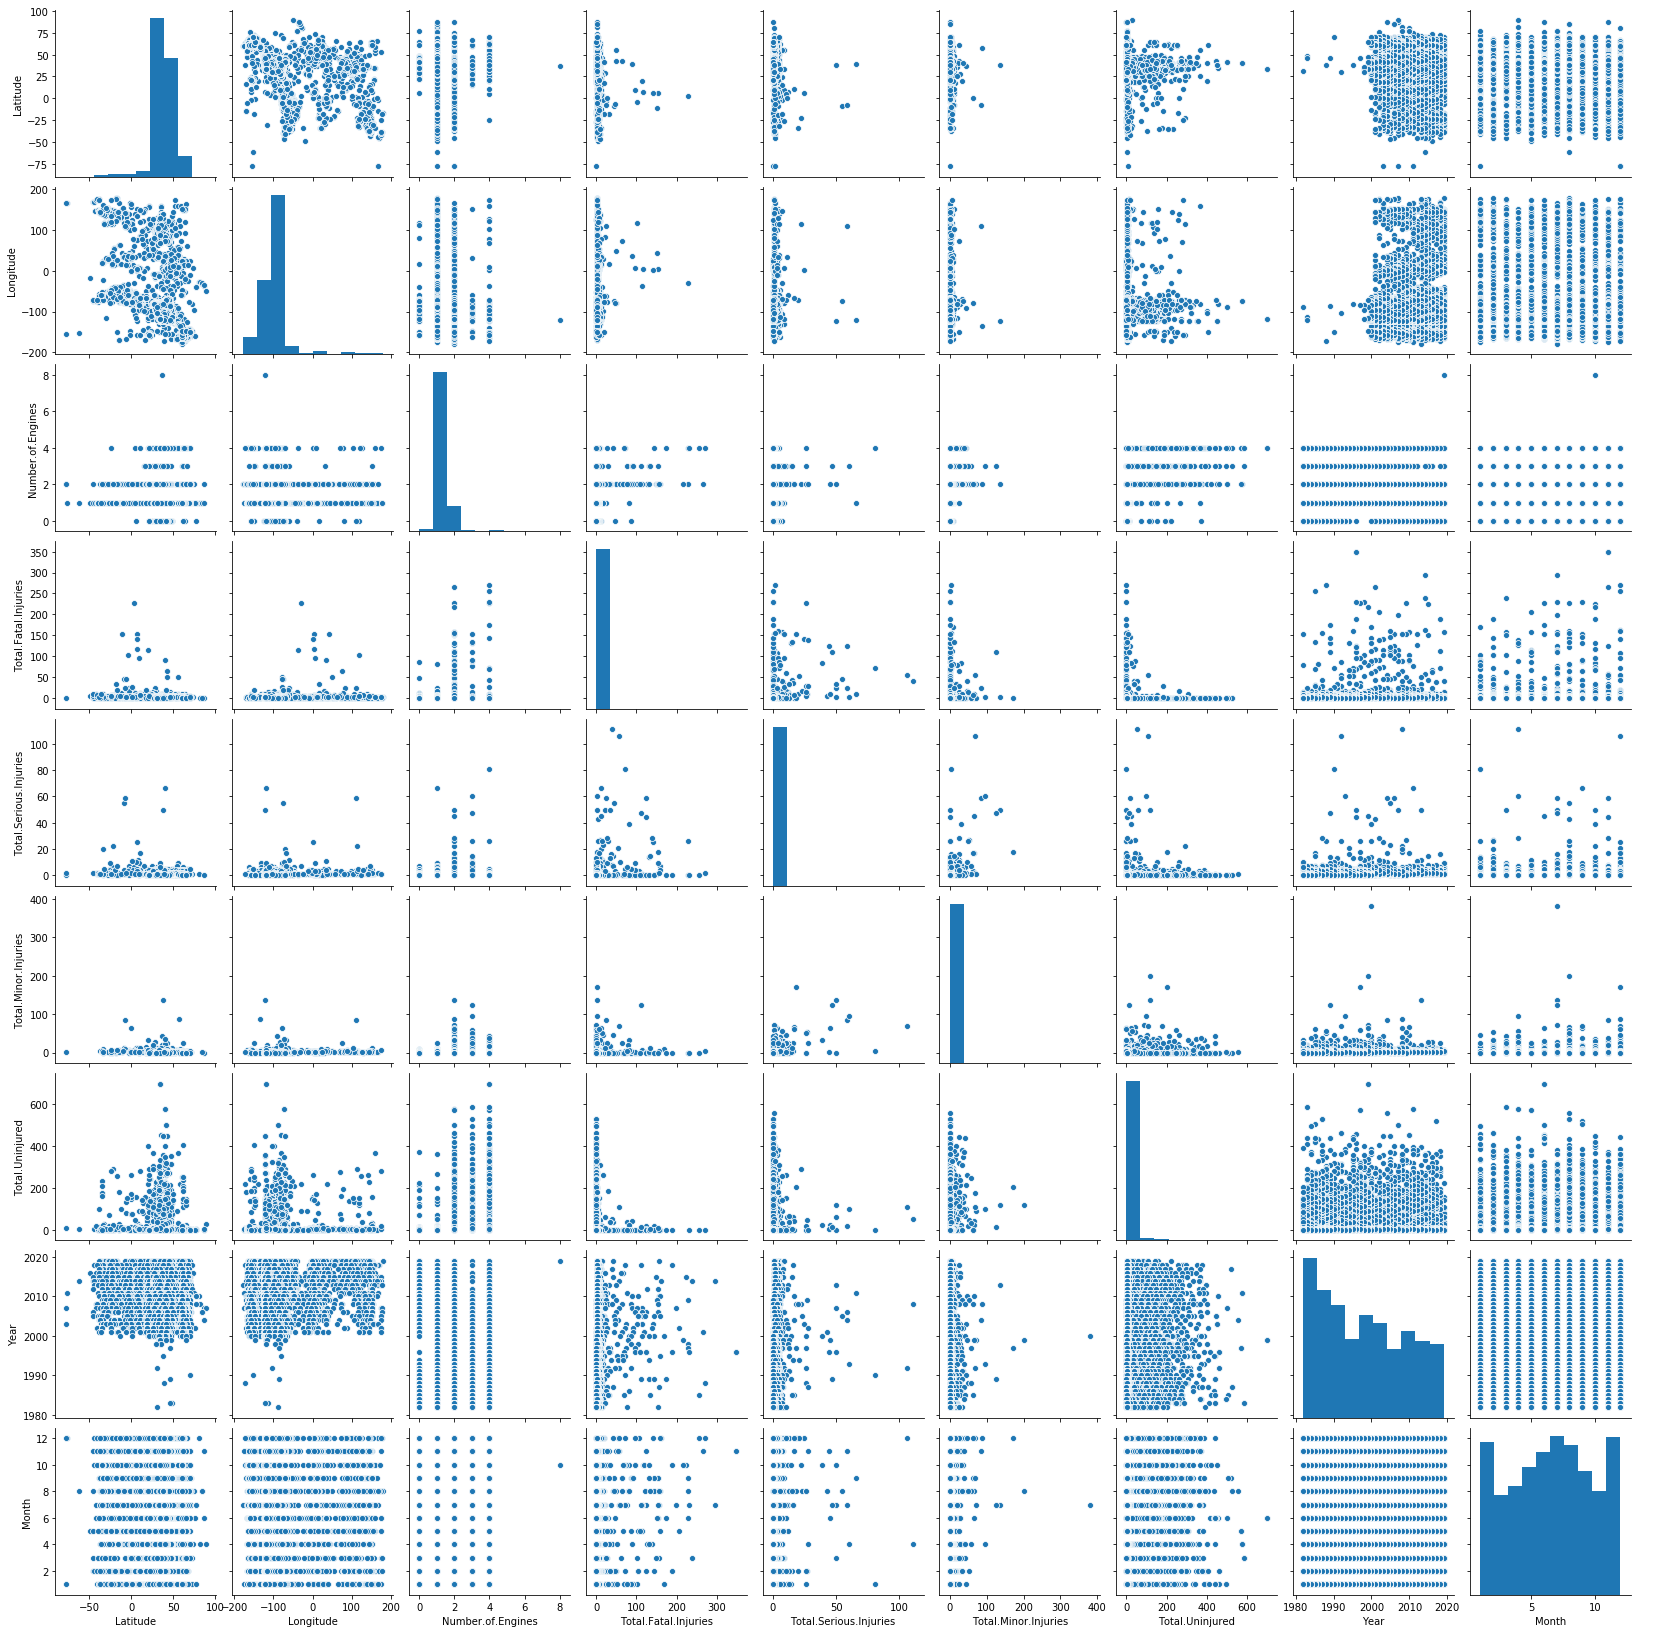

In [34]:
sb.pairplot(data = AviationData)

Compare Amateur Built vs Number of injuries

In [35]:
amateurbuilt = pd.DataFrame(AviationData['Amateur.Built'])


In [36]:
builtvsinjuries = pd.concat([Casualties, amateurbuilt.reindex(index=Casualties.index)], sort = False,axis=1, join='inner')
builtvsinjuries.fillna('No',inplace =True)


In [37]:
y = pd.DataFrame(builtvsinjuries["Amateur.Built"])
x = pd.DataFrame(builtvsinjuries["Total.Casualties"])

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 1)
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (30854, 1) (30854, 1)
Test Set  : (7714, 1) (7714, 1)


In [39]:
y_train["Amateur.Built"].value_counts()

No     26892
Yes     3962
Name: Amateur.Built, dtype: int64

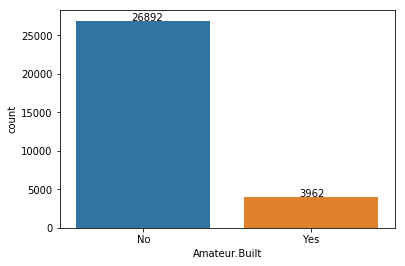

In [40]:
amateurplot = sb.countplot(y_train["Amateur.Built"])
for h in amateurplot.patches:
    amateurplot.annotate('{:d}'.format(h.get_height()), (h.get_x()+0.33, h.get_height()+50))

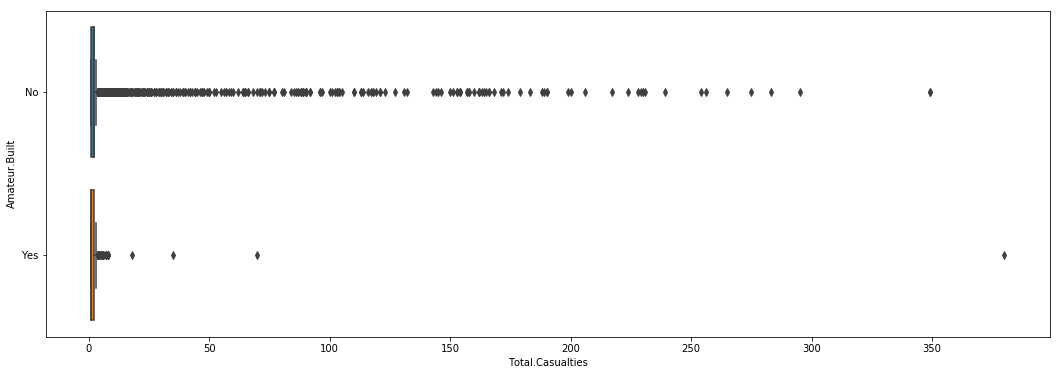

In [41]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "Total.Casualties", y = "Amateur.Built", data = builtvsinjuries, orient = "h")

In [42]:
dectree = DecisionTreeClassifier(max_depth = 3)
dectree.fit(x_train, y_train) 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

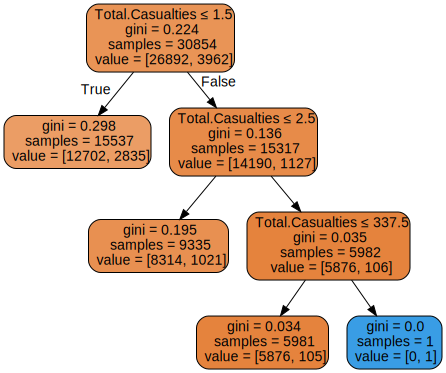

In [43]:
treedot = export_graphviz(dectree,                                      
                          feature_names = x_train.columns,
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                    
graphviz.Source(treedot)

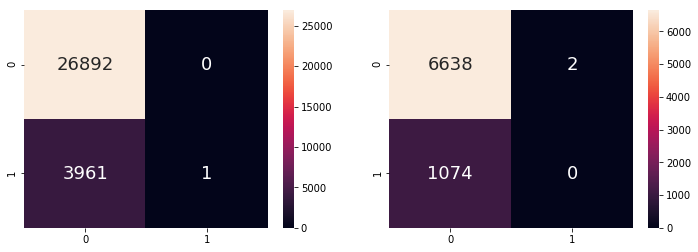

In [44]:
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [45]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8716211836390744

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8605133523463832



Note the huge imbalance in the False Negatives in the confusion matrix. In case of Training Data, False Negatives =3961 . In case of Test Data, False Negatives = 1074. This is not surprising -- actually, this is a direct effect of the huge Yes vs No imbalance in the Amateur.Built variable. 

As Amateur.Built = No was more likely in the data, False Negatives are more likely too. This is not a very good situation for a classification problem. It is desirable to have balanced classes for classification, and there are several methods to make imbalanced classes balanced, or to get desired classification results even from imbalanced classes. 

In this case we will be undersampling the Amateur.Built data to obtain more balanced classes.